In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

rng = np.random.default_rng(100)
# seaborn的坐标轴是写在参数里的 ax=ax

<AxesSubplot:>

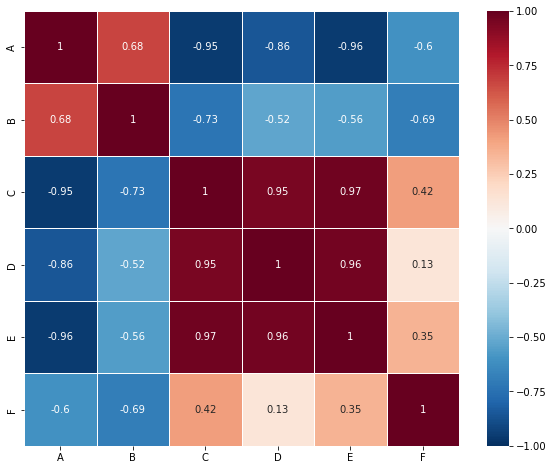

In [3]:
# heatmap热力图
# annot显示数字，fmt小数点格式
# square保证正方形
# linewidth分割线
data = np.array([
    [0.8       , 0.55555556, 0.95238095, 0.81818182, 0.71428571, 1.        ],
    [1.        , 1.        , 0.85714286, 0.69230769, 0.42857143, 0.5       ],
    [0.72      , 0.74074074, 1.        , 1.        , 1.        , 0.7       ],
    [0.88      , 0.66666667, 0.95238095, 0.9       , 0.71428571, 0.5       ]])
data = pd.DataFrame(data)
data.columns=['A', 'B', 'C', 'D', 'E', 'F']

data_corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True, vmin=-1, vmax=1, square=True, cmap='RdBu_r', fmt='.2g', linewidths=0.5, ax=ax)


Text(0.5, 1.0, 'heatmap()')

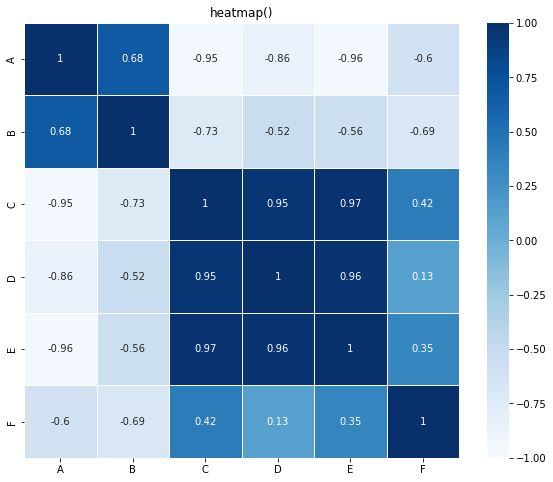

In [4]:
# heatmap热力图
# cmap用'Blues'比较美观
data = np.array([
    [0.8       , 0.55555556, 0.95238095, 0.81818182, 0.71428571, 1.        ],
    [1.        , 1.        , 0.85714286, 0.69230769, 0.42857143, 0.5       ],
    [0.72      , 0.74074074, 1.        , 1.        , 1.        , 0.7       ],
    [0.88      , 0.66666667, 0.95238095, 0.9       , 0.71428571, 0.5       ]])
data = pd.DataFrame(data)
data.columns=['A', 'B', 'C', 'D', 'E', 'F']

data_corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True, vmin=-1, vmax=1, square=True, cmap='Blues', fmt='.2g', linewidths=0.5, ax=ax)
ax.set_title('heatmap()')

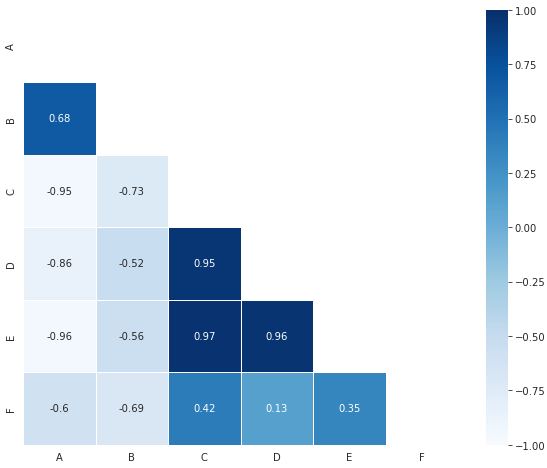

In [5]:
# heatmap热力图
# mask遮挡一部分图像（相关系数矩阵绘图）
data = np.array([
    [0.8       , 0.55555556, 0.95238095, 0.81818182, 0.71428571, 1.        ],
    [1.        , 1.        , 0.85714286, 0.69230769, 0.42857143, 0.5       ],
    [0.72      , 0.74074074, 1.        , 1.        , 1.        , 0.7       ],
    [0.88      , 0.66666667, 0.95238095, 0.9       , 0.71428571, 0.5       ]])
data = pd.DataFrame(data)
data.columns=['A', 'B', 'C', 'D', 'E', 'F']
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
# mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data_corr, annot=True, mask=mask, vmin=-1, vmax=1, square=True, cmap='Blues', fmt='.2g', linewidths=0.5, ax=ax)

In [6]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


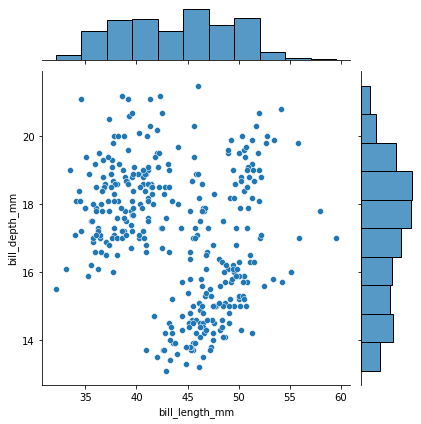

In [7]:
# jointplot双变量联合分布图
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

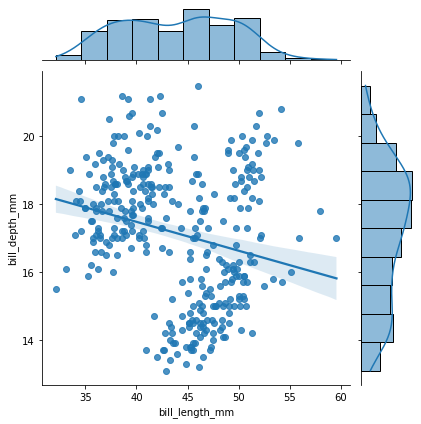

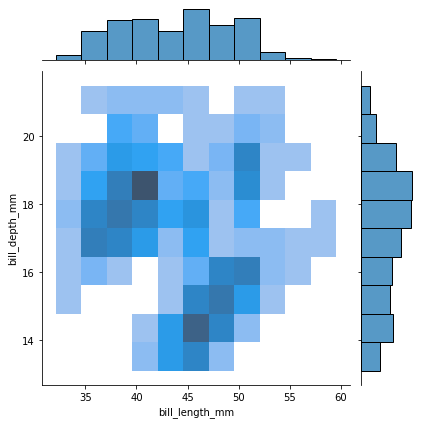

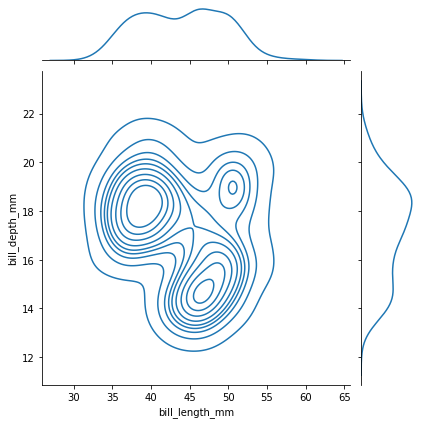

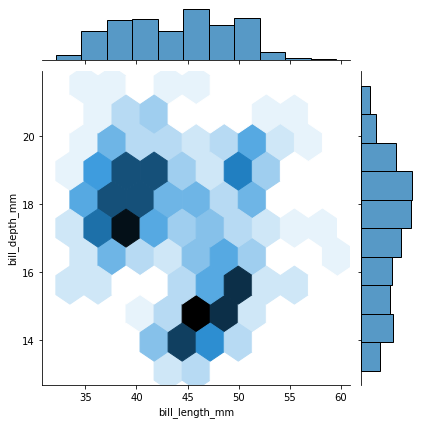

In [8]:
# jointplot双变量联合分布图
# kind='reg'自动做出回归曲线
# kind='hist'用柱状图
# kind='kde' 核密度曲线
# kind='hex' 蜂窝图
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind='reg')
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind='hist')
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind='kde')
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind='hex')

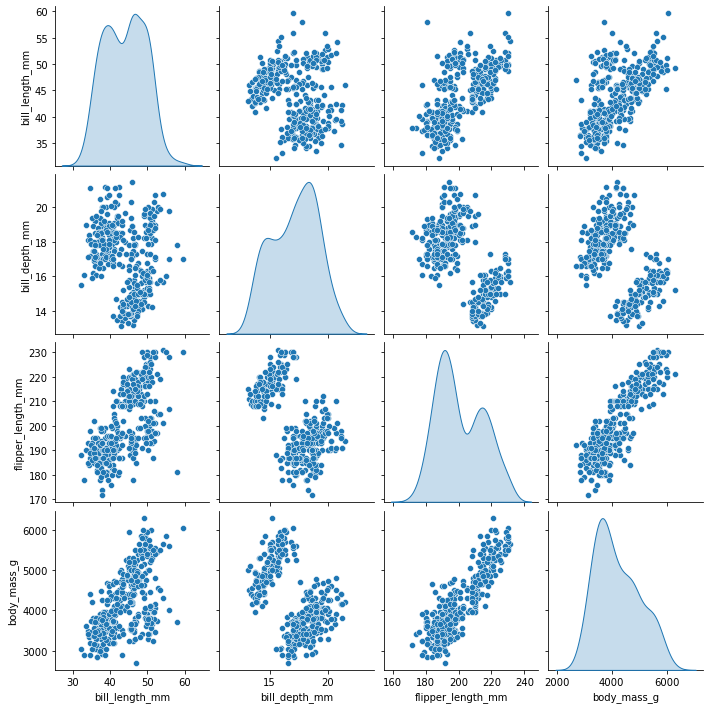

In [11]:
# pairplot散布矩阵图
# kind是整张图
# diag_kind只有对角线


# sns.pairplot(data=penguins)
# sns.pairplot(data=penguins, kind='kde')
sns.pairplot(data=penguins, diag_kind='kde')
plt.savefig("Figure.png",dpi=600) # 只会保存最后一张图
plt.grid(True)

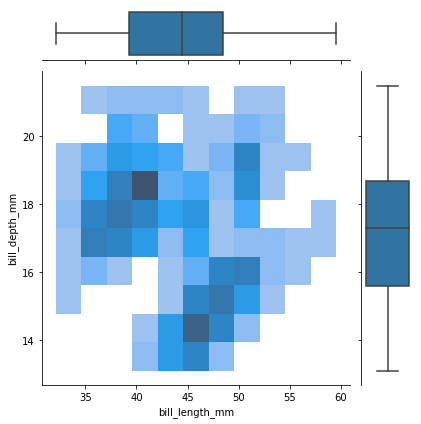

In [14]:
# JointGrid自由设置联合图表
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

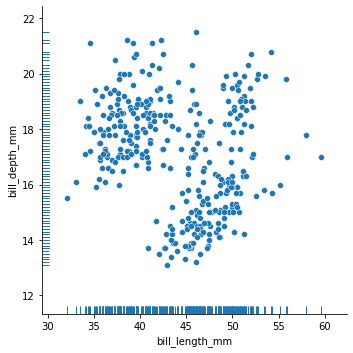

In [17]:
# rugplot 边际分布，在轮廓上添加“毛毯”
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")